In [ ]:
# Data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint
import datetime

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100

sns.set()


%matplotlib inline
# Display all cell outputs

# Analysis

In [2]:
df_calendar = pd.read_csv('data/calendar.csv.gz', low_memory=False)

In [3]:
print(f"There are {df_calendar.listing_id.nunique()} of unique listings")

There are 80767 of unique listings


In [4]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29480811 entries, 0 to 29480810
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    float64
maximum_nights    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.5+ GB


In [5]:
def clean_df(df):
    """Remove the dollar sign in front of price and adjusted_price, Convert the categorical varaible into binary variable,
       and turn date to datetime object.

       inputs:
           df: A pandas dataframe object
       returns:
           df: A cleaned version of dataframe
    """
    df1 = df.copy()
    
    df1['price'] = df1['price'].str.replace(',', '')
    df1['price'] = df1['price'].str.replace('$', '').astype(float)
    
    df1['adjusted_price'] = df1['adjusted_price'].str.replace(',', '')
    df1['adjusted_price'] = df1['adjusted_price'].str.replace('$', '').astype(float)
    
    
    df1['bookings'] = df1['available'].map(lambda x: 0 if x == 't' else 1)
    
    df1['date'] = pd.to_datetime(df1['date'])
    df1 = df1[df1.date != '2020-05-05']
    df1['month'] = df1['date'].dt.strftime('%B')
    
    return df1
    

In [6]:
cleaned_calendar = clean_df(df_calendar)

In [7]:
cleaned_calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,bookings,month
0,11551,2019-05-06,f,105.0,105.0,2.0,180.0,1,May
1,11551,2019-05-07,f,105.0,105.0,2.0,180.0,1,May
2,99333,2019-05-06,f,111.0,111.0,2.0,28.0,1,May
3,99333,2019-05-07,f,79.0,79.0,2.0,28.0,1,May
4,99333,2019-05-08,f,79.0,79.0,2.0,28.0,1,May


In [8]:
num_bookings = cleaned_calendar.groupby(['listing_id']).bookings.count()
num_bookings[num_bookings > 365].head()

listing_id
26628731    366
26629436    366
26678149    366
26683298    366
26746800    366
Name: bookings, dtype: int64

In [9]:
avg_booked_rate = cleaned_calendar.groupby('date')['bookings'].mean()

In [10]:
avg_booked_rate.tail()

date
2020-04-30    0.711603
2020-05-01    0.711107
2020-05-02    0.710934
2020-05-03    0.710154
2020-05-04    0.691769
Name: bookings, dtype: float64

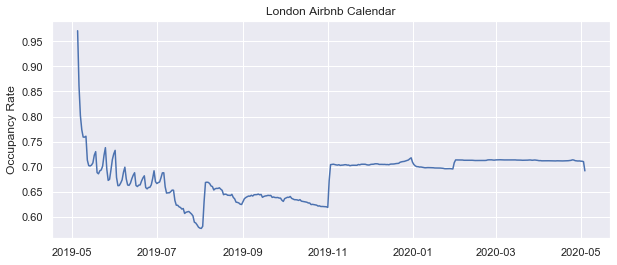

In [20]:
fig, ax = plt.subplots(figsize=(10,4))
lineplot = sns.lineplot(color='b',
             ax=ax,
             data = avg_booked_rate)
ax.set_title('London Airbnb Calendar')
ax.set_ylabel('Occupancy Rate')

lineplot.figure.savefig('images/calendar.png', dpi=800);

In [12]:
monthly_price = cleaned_calendar.groupby(['date'], sort=False)['price'].mean()
monthly_price_df = monthly_price.to_frame().reset_index()
monthly_price_df['month'] = monthly_price_df['date'].dt.strftime('%B')
#monthly_price_df['day'] = monthly_price_df['date'].dt.strftime('%A')

In [13]:
monthly_price_df = monthly_price_df[monthly_price_df.price > 105]

In [19]:
monthly_price_df.to_csv('preprocessed_data/avg_price_listings.csv')

In [14]:
monthly_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 3 columns):
date     365 non-null datetime64[ns]
price    365 non-null float64
month    365 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 11.4+ KB


**Which month is more expensive to travel on?**

* The average prices tends to increases along the year except for May which is signifactly lower than the other months. In comparsion to the 'Number of reviews' plots in previous sections, the pattern is similar except for May and December. 
* December is more expensive compared to the other months. This may be because december is the holiday season and people are more likely to travel. May is the cheapest month to make a booking in Airbnb, maybe because it's closer to exam period. 

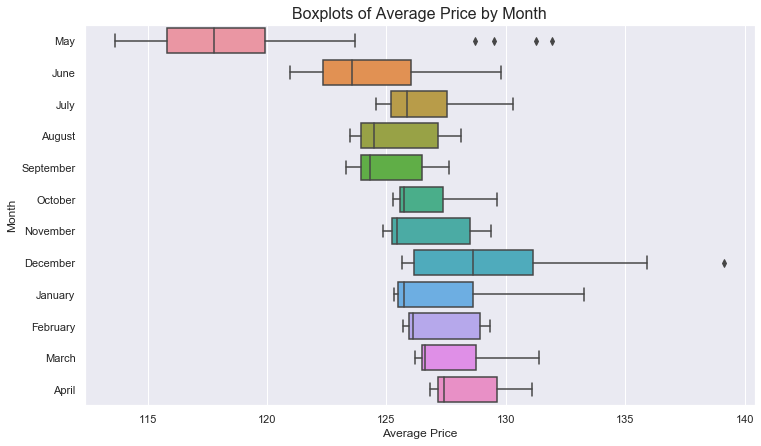

In [21]:
fig, ax = plt.subplots(figsize=(12, 7))
monthly_boxplot = sns.boxplot(monthly_price_df.price, monthly_price_df.month)
ax.set_xlabel('Average Price', fontsize=12)
ax.set_ylabel('Month', fontsize=12)
ax.set_title('Boxplots of Average Price by Month', fontsize=16)
fig.savefig('images/boxplot_price.png', dpi=800);